<a href="https://colab.research.google.com/github/ZEY0D/FashionVision/blob/main/Deep_learning__Fashion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D,MaxPool2D
from keras import backend as k
from tensorflow.keras.activations import relu, softmax

In [ ]:
minst = tf.keras.datasets.fashion_mnist

x -> training

y -> testing

Dataset:
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [ ]:
(x_images , x_labels) , (y_images , y_labels) = minst.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

verifying the dataset

In [ ]:
x_images.shape
# 28 x 28 all are grey scaled

(60000, 28, 28)

In [ ]:
y_images.shape

(10000, 28, 28)

rendering the dataset

In [ ]:
import matplotlib.pyplot as plt

single image

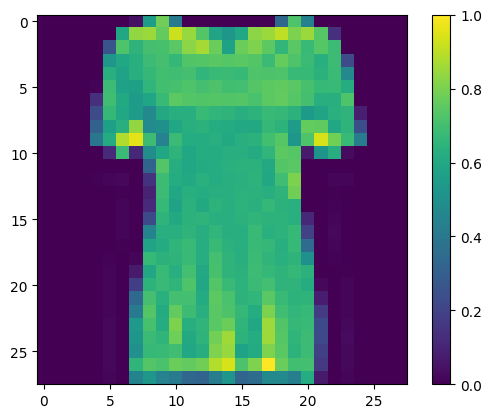

In [ ]:
plt.figure()
plt.imshow(x_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

now it's working, let's normalize our data

In [ ]:
x_images = x_images / 255.0
y_images = y_images / 255.0

building our sequential model

In [ ]:
model = tf.keras.Sequential(
   [ keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation=relu),
    keras.layers.Dense(10, activation=softmax)
   ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(x_images, x_labels , epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7826 - loss: 0.6361
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8625 - loss: 0.3866
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8728 - loss: 0.3511
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8862 - loss: 0.3105
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8906 - loss: 0.2973
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8933 - loss: 0.2845
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9018 - loss: 0.2661
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9045 - loss: 0.2601
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9099 - loss: 0.2441
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9138 - loss: 0.2312


evaluate to get the testing accuracy

In [ ]:
test_loss , test_acc = model.evaluate(y_images , y_labels , verbose= 2)

313/313 - 1s - 2ms/step - accuracy: 0.8845 - loss: 0.3264


In [ ]:
predict = model.predict(y_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
import numpy as np
np.argmax(predict[0])

np.int64(9)

the model needs to be updated to increase the accuracy so we will use CNN for image classification
